# Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Training Image Preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\rohit\Documents\MGIT\Projects\CROP\crop recommendation\plant disease dataset\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


## Validation Image Preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\rohit\Documents\MGIT\Projects\CROP\crop recommendation\plant disease dataset\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


# Model Building

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential
model=Sequential()

## Building convolutional layer

In [8]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1500,activation='relu'))
model.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting
model.add(tf.keras.layers.Dense(units=38,activation='softmax'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

## Compiling the model

In [10]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 157s 72ms/step - loss: 1.2922 - accuracy: 0.6162 - val_loss: 0.4590 - val_accuracy: 0.8609
Epoch 2/10
2197/2197 [==============================] - 157s 71ms/step - loss: 0.4386 - accuracy: 0.8602 - val_loss: 0.2788 - val_accuracy: 0.9085
Epoch 3/10
2197/2197 [==============================] - 165s 75ms/step - loss: 0.2636 - accuracy: 0.9148 - val_loss: 0.2174 - val_accuracy: 0.9285
Epoch 4/10
2197/2197 [==============================] - 157s 71ms/step - loss: 0.1867 - accuracy: 0.9397 - val_loss: 0.1667 - val_accuracy: 0.9462
Epoch 5/10
2197/2197 [==============================] - 156s 71ms/step - loss: 0.1390 - accuracy: 0.9546 - val_loss: 0.1233 - val_accuracy: 0.9623
Epoch 6/10
2197/2197 [==============================] - 156s 71ms/step - loss: 0.1113 - accuracy: 0.9629 - val_loss: 0.1693 - val_accuracy: 0.9487
Epoch 7/10
2197/2197 [==============================] - 157s 71ms/step - loss: 0.0877 - accuracy: 0.9715 - val_loss: 0

# Model Evaluation

In [14]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 54s 24ms/step - loss: 0.0252 - accuracy: 0.9915
Training accuracy: 0.9915499091148376


In [16]:
print('Training loss:', train_loss)

Training loss: 0.025225777179002762


In [15]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 12s 21ms/step - loss: 0.1169 - accuracy: 0.9664
Validation accuracy: 0.9663669466972351


In [17]:
print('Validation loss:', val_loss)

Validation loss: 0.1168801560997963


# Saving model

In [18]:
model.save('trained_plant_disease_model.h5')

In [19]:
training_history.history #Return Dictionary of history

{'loss': [1.2922470569610596,
  0.43855488300323486,
  0.263563871383667,
  0.18669354915618896,
  0.13899466395378113,
  0.11129553616046906,
  0.0877111554145813,
  0.07642458379268646,
  0.06733042746782303,
  0.056975848972797394],
 'accuracy': [0.6161746978759766,
  0.860231876373291,
  0.91481614112854,
  0.9396827816963196,
  0.9545629024505615,
  0.9628565311431885,
  0.9715484976768494,
  0.9750195741653442,
  0.9783056974411011,
  0.9813215732574463],
 'val_loss': [0.45904022455215454,
  0.27881214022636414,
  0.21735849976539612,
  0.16674494743347168,
  0.12330738455057144,
  0.16925285756587982,
  0.1784604787826538,
  0.153540700674057,
  0.11575404554605484,
  0.11688020080327988],
 'val_accuracy': [0.8608582019805908,
  0.9085476994514465,
  0.928465723991394,
  0.9461643695831299,
  0.9622695446014404,
  0.948668360710144,
  0.9466765522956848,
  0.9551559090614319,
  0.9658547639846802,
  0.9663669466972351]}

In [20]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [21]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Accuracy Visualization

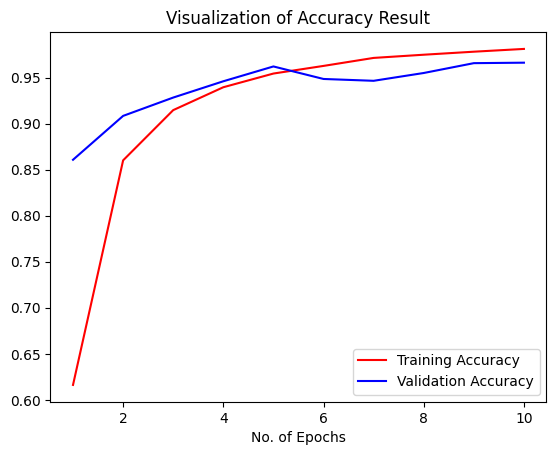

In [22]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()